### Домашняя работа

**Задание среднего уровня** Примените градиентный спуск к задаче прогнозирования цен на недвижимость в Бостоне. Какого качества на валидации удалось достичь по r2-score? Сколько итераций  понадобилось?

In [16]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
from sklearn.metrics import r2_score
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml

In [17]:
boston_dataset = fetch_openml(data_id=531)

X = boston_dataset.data
y = boston_dataset.target

X_scaled = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=13)

c:\Users\207an\Desktop\jupiter-labs\.conda\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Итерации остановлены на шаге 37
r2- 0.7183060989957019


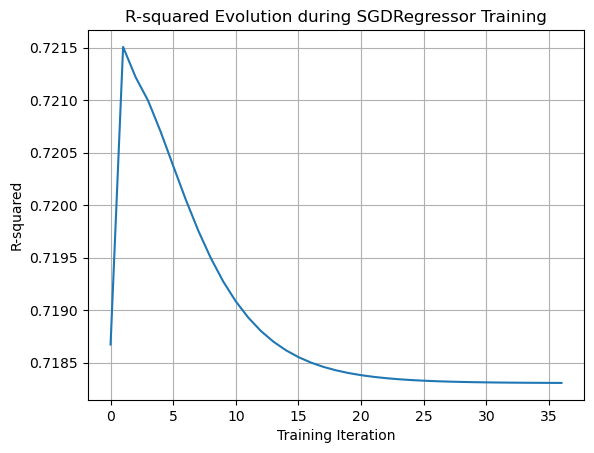

In [29]:
from sklearn.metrics import mean_squared_error

SDG_Reg = SGDRegressor(learning_rate='constant', eta0=0.009, fit_intercept=True, random_state=5)

w_current, epsilon = np.random.random(X.shape[1]),0.0001
weight_evolution, r2_evolution, mse_evolution = [], [], [] # изменения весов и ошибка на валидации

for step in list(range(800)):
    sgd_regressor = SDG_Reg.partial_fit(X_train, y_train)
    weight_evolution.append(distance.euclidean(w_current, SDG_Reg.coef_)) # distance.euclidea ??
    if weight_evolution[-1]<epsilon:
        print("Итерации остановлены на шаге %d" % step); break
    r2_evolution.append(r2_score(y_test, SDG_Reg.predict(X_test)))
    #mse_evolution.append(mean_squared_error(y_test, SDG_Reg.predict(X_test)))
    w_current = SDG_Reg.coef_.copy()
print("r2-",r2_score(y_test, SDG_Reg.predict(X_test)))
#print("MSE-",mean_squared_error(y_test, SDG_Reg.predict(X_test)))

plt.plot(range(len(r2_evolution)), r2_evolution)  # Assuming len(r2_evolution) matches training iterations
plt.xlabel("Training Iteration")
plt.ylabel("R-squared")
plt.title("R-squared Evolution during SGDRegressor Training")
plt.grid(True)

# plt.show()
# plt.plot(range(len(mse_evolution)), mse_evolution)  # Assuming len(mse_evolution) matches training iterations
# plt.xlabel("Training Iteration")
# plt.ylabel("Mean Squared Error")
# plt.title("Mean Squared Error Evolution during SGDRegressor Training")
# plt.grid(True)
# plt.show()